<font size=6> <b> SMU Lab Two - MSDS7331 - Machine Learning-1 </b> </font>

<font size=5> <b> Summer 2020 Group - Sachin, Ikenna, Edgar, Dustin </b></font> 




<img src="https://github.com/sachinac/ML7331/blob/master/data/data_mining.jpg?raw=true"> 

<p align="center"><font size=5> <b> Health Care Fraud Detection  </b></font> </p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1">Import Libraries</a></span></li><li><span><a href="#Data-Preparation-Part-1" data-toc-modified-id="Data-Preparation-Part-1-2">Data Preparation Part 1</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2.1">Load Data</a></span></li><li><span><a href="#Set-Categorical-Variables" data-toc-modified-id="Set-Categorical-Variables-2.2">Set Categorical Variables</a></span></li><li><span><a href="#Set-Float-Variables" data-toc-modified-id="Set-Float-Variables-2.3">Set Float Variables</a></span></li><li><span><a href="#Set-Integer-Variables" data-toc-modified-id="Set-Integer-Variables-2.4">Set Integer Variables</a></span></li><li><span><a href="#Set-Date-Variables" data-toc-modified-id="Set-Date-Variables-2.5">Set Date Variables</a></span></li><li><span><a href="#Recoding-Binary-and-Categorical-Features" data-toc-modified-id="Recoding-Binary-and-Categorical-Features-2.6">Recoding Binary and Categorical Features</a></span></li><li><span><a href="#Final-Dataframe---All-Features" data-toc-modified-id="Final-Dataframe---All-Features-2.7">Final Dataframe - All Features</a></span></li><li><span><a href="#Set-Target-Variable" data-toc-modified-id="Set-Target-Variable-2.8">Set Target Variable</a></span></li><li><span><a href="#One-Hot-Encoding-using-SciKit-Learn-Multi-Label-Binarizer" data-toc-modified-id="One-Hot-Encoding-using-SciKit-Learn-Multi-Label-Binarizer-2.9">One Hot Encoding using SciKit Learn Multi Label Binarizer</a></span></li><li><span><a href="#One-Hot-Encoding-using-Pandas" data-toc-modified-id="One-Hot-Encoding-using-Pandas-2.10">One Hot Encoding using Pandas</a></span></li><li><span><a href="#Post-processing-Encoded-Features" data-toc-modified-id="Post-processing-Encoded-Features-2.11">Post-processing Encoded Features</a></span></li><li><span><a href="#Remove-'None'-columns" data-toc-modified-id="Remove-'None'-columns-2.12">Remove 'None' columns</a></span><ul class="toc-item"><li><span><a href="#Regression-DataSet" data-toc-modified-id="Regression-DataSet-2.12.1">Regression DataSet</a></span></li></ul></li><li><span><a href="#MinMaxScaler" data-toc-modified-id="MinMaxScaler-2.13">MinMaxScaler</a></span><ul class="toc-item"><li><span><a href="#Classification-Setting" data-toc-modified-id="Classification-Setting-2.13.1">Classification Setting</a></span></li><li><span><a href="#Regression-Setting" data-toc-modified-id="Regression-Setting-2.13.2">Regression Setting</a></span></li></ul></li></ul></li><li><span><a href="#Data-Preparation-Part-2" data-toc-modified-id="Data-Preparation-Part-2-3">Data Preparation Part 2</a></span><ul class="toc-item"><li><span><a href="#Classification-Final-DataSet" data-toc-modified-id="Classification-Final-DataSet-3.1">Classification Final DataSet</a></span></li><li><span><a href="#Classifcation-Target-Variable" data-toc-modified-id="Classifcation-Target-Variable-3.2">Classifcation Target Variable</a></span></li><li><span><a href="#Regression-Final-Dataset" data-toc-modified-id="Regression-Final-Dataset-3.3">Regression Final Dataset</a></span></li><li><span><a href="#Regression-Target-Variable" data-toc-modified-id="Regression-Target-Variable-3.4">Regression Target Variable</a></span></li></ul></li><li><span><a href="#Modeling-and-Evaluation-1" data-toc-modified-id="Modeling-and-Evaluation-1-4">Modeling and Evaluation 1</a></span><ul class="toc-item"><li><span><a href="#Task-1:-Classification---Provider-Fraud" data-toc-modified-id="Task-1:-Classification---Provider-Fraud-4.1">Task 1: Classification - Provider Fraud</a></span></li><li><span><a href="#Task-2:-Regression" data-toc-modified-id="Task-2:-Regression-4.2">Task 2: Regression</a></span></li></ul></li><li><span><a href="#Modeling-and-Evaluation-2" data-toc-modified-id="Modeling-and-Evaluation-2-5">Modeling and Evaluation 2</a></span><ul class="toc-item"><li><span><a href="#Sparse-Matrix-Conversion-and-Test/Train-Split" data-toc-modified-id="Sparse-Matrix-Conversion-and-Test/Train-Split-5.1">Sparse Matrix Conversion and Test/Train Split</a></span></li><li><span><a href="#Cross-Validation-Method" data-toc-modified-id="Cross-Validation-Method-5.2">Cross Validation Method</a></span></li></ul></li><li><span><a href="#Modeling-and-Evaluations-3" data-toc-modified-id="Modeling-and-Evaluations-3-6">Modeling and Evaluations 3</a></span><ul class="toc-item"><li><span><a href="#function-Defnitions" data-toc-modified-id="function-Defnitions-6.1">function Defnitions</a></span><ul class="toc-item"><li><span><a href="#1.0-testPerformance" data-toc-modified-id="1.0-testPerformance-6.1.1">1.0 testPerformance</a></span></li><li><span><a href="#2.0-Display-Weights" data-toc-modified-id="2.0-Display-Weights-6.1.2">2.0 Display Weights</a></span></li><li><span><a href="#3.0-lab2_grid_search" data-toc-modified-id="3.0-lab2_grid_search-6.1.3">3.0 lab2_grid_search</a></span></li></ul></li><li><span><a href="#Classification-Models" data-toc-modified-id="Classification-Models-6.2">Classification Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.2.1">Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Logistic-Parameters" data-toc-modified-id="Logistic-Parameters-6.2.1.1">Logistic Parameters</a></span></li><li><span><a href="#Parameter-Grid" data-toc-modified-id="Parameter-Grid-6.2.1.2">Parameter Grid</a></span></li><li><span><a href="#GridSearch" data-toc-modified-id="GridSearch-6.2.1.3">GridSearch</a></span></li><li><span><a href="#Logistic-weights" data-toc-modified-id="Logistic-weights-6.2.1.4">Logistic weights</a></span></li></ul></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-6.2.2">Random forest</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-Parameters" data-toc-modified-id="Random-Forest-Parameters-6.2.2.1">Random Forest Parameters</a></span></li><li><span><a href="#Parameter-Grid" data-toc-modified-id="Parameter-Grid-6.2.2.2">Parameter Grid</a></span></li><li><span><a href="#GridSearch" data-toc-modified-id="GridSearch-6.2.2.3">GridSearch</a></span></li><li><span><a href="#Random-Forest-Weights" data-toc-modified-id="Random-Forest-Weights-6.2.2.4">Random Forest Weights</a></span></li></ul></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-6.2.3">Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes-Parameters" data-toc-modified-id="Naive-Bayes-Parameters-6.2.3.1">Naive Bayes Parameters</a></span></li><li><span><a href="#Parameter-Grid" data-toc-modified-id="Parameter-Grid-6.2.3.2">Parameter Grid</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-6.2.3.3">Grid Search</a></span></li><li><span><a href="#Naive-Bayes-Weights" data-toc-modified-id="Naive-Bayes-Weights-6.2.3.4">Naive Bayes Weights</a></span></li></ul></li></ul></li><li><span><a href="#Regression-Models" data-toc-modified-id="Regression-Models-6.3">Regression Models</a></span><ul class="toc-item"><li><span><a href="#Split-Train/Test" data-toc-modified-id="Split-Train/Test-6.3.1">Split Train/Test</a></span></li><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-6.3.2">Multiple Linear Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.3.3">Random Forest</a></span></li><li><span><a href="#kNN" data-toc-modified-id="kNN-6.3.4">kNN</a></span></li></ul></li></ul></li><li><span><a href="#Modeling-and-Evaluations-4" data-toc-modified-id="Modeling-and-Evaluations-4-7">Modeling and Evaluations 4</a></span></li><li><span><a href="#Modeling-and-Evaluations-5" data-toc-modified-id="Modeling-and-Evaluations-5-8">Modeling and Evaluations 5</a></span></li><li><span><a href="#Modeling-and-Evaluations-6" data-toc-modified-id="Modeling-and-Evaluations-6-9">Modeling and Evaluations 6</a></span></li><li><span><a href="#Deployment" data-toc-modified-id="Deployment-10">Deployment</a></span></li><li><span><a href="#Exceptional-Work" data-toc-modified-id="Exceptional-Work-11">Exceptional Work</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Preprocessing:" data-toc-modified-id="Preprocessing:-11.0.1">Preprocessing:</a></span></li><li><span><a href="#Pipelines-and-Grid-Search:" data-toc-modified-id="Pipelines-and-Grid-Search:-11.0.2">Pipelines and Grid Search:</a></span></li></ul></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-12">References</a></span></li></ul></div>

# Import Libraries

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import timeit
import warnings 

from math import sqrt

from scipy.sparse import csc_matrix
from scipy import interp

from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 
from sklearn.metrics import roc_curve, auc, recall_score
from sklearn.tree import DecisionTreeRegressor

from yellowbrick.regressor import ResidualsPlot, CooksDistance, PredictionError
from yellowbrick.model_selection import LearningCurve, ValidationCurve

lab2_random_state  = 100

# **Data Preparation Part 1**

## Load Data

Load data into memory. EDA was already performed on this data. We had originally received Beneficiary, Encounters and target variable datasets in three different spreadsheets and EDA combined that into single spreadsheet using keys of the tables. We still need to perform some additional operations before we actually start with modeling. So in first we prepare our data for modeling as follows :
* Prepare variables. Setup data type correctly.
* Remove unnecessary variables
* Transform categorical features into dummy variables 
* Feature selection.

Lets first print the information of this dataframe. As we can see from below dataframe info this data has total of 79 features. We definately dont need all features. This step will process some of the features before we actually use this data for modeling.

In [2]:
lab2_df = pd.read_csv('data/final_fraud_dataset.csv',index_col=0)

## Set Categorical Variables

Following are nominal categorical attributes. Pandas requires these to be datatype of 'object' or 'category'. We are setting nominal categorical variables as 'object'. Here is the list of categorical variables :

* Race
* Gender
* RenalDiseaseIndicator
* State
* County
* AttendingPhysicianPresent
* OtherPhysicianPresent
* OperatingPhysicianPresent
* 11 Chronic Conditions



In [3]:
cat_preds = ['Gender','Race','RenalDiseaseIndicator','State','County',
             'NoOfMonths_PartACov','NoOfMonths_PartBCov',
             'ChronicCond_Alzheimer','ChronicCond_Heartfailure',
             'ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
             'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
             'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke',
             'Alive','ClmAdmitDiagnosisCode','DiagnosisGroupCode',
             'ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3',
             'ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6',
             'ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9',
             'ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2',
             'ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5',
             'AttendingPhysicianPresent','OtherPhysicianPresent','OperatingPhysicianPresent']

lab2_df[cat_preds]   = lab2_df[cat_preds].astype('object')


## Set Float Variables

Following varibles are required to be datatype of floating point. These are amounts and hence it makes sense to changt it's type to float

* InscClaimAmtReimbursed
* IPAnnualReimbursementAmt
* IPAnnualDeductibleAmt


In [4]:
float_preds = ['InscClaimAmtReimbursed','IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt']

lab2_df[float_preds]   = lab2_df[float_preds].astype('float')

## Set Integer Variables

These variables contains all numbers but they are actually nominal categorical attributes. They are all binary in nature. So we can keep them as integer as we will be converting this dataset into sparse matrix for model building exercise. 

Following variables will be set as integer data type :
* NoOfMonths_PartACov - Number of months of Medicare part A coverage
* NoOfMonths_PartBCov - Number of months of Medicare part B coverage


In [5]:
int_preds = ['NoOfMonths_PartACov', 
             'NoOfMonths_PartBCov']

lab2_df[int_preds] = lab2_df[int_preds].astype(int)

## Set Date Variables

Following are new attributes are derived from existing attritbutes of type dates. All date attributes are converted to the proleptic Gregorian ordinal of a date.In simple terms datetime.toordinal() returns the day count from the date 01/01/01


* ORD_DOD - Set ORD_DOD to open end date where date is not available to indicate that Beneficiary is alive
* ORD_DOB 
* ORD_ClaimStartDt
* ORD_ClaimEndDt
* ORD_AdmissionDt
* ORD_DischargeDt


In [6]:
dte_preds = ['ClaimStartDt', 'ClaimEndDt','AdmissionDt', 'DischargeDt', 'DOB','DOD']

# Regex to normalize integer DOB/DOD as ISO dates
lab2_df['ORD_DOB'] = lab2_df['DOB'].astype(str).str.replace('(\d{4})(\d\d)(\d\d)', '\\1-\\2-\\3', regex=True) 
lab2_df['ORD_DOD'] = lab2_df['DOD'].astype(str).str.replace('(\d{4})(\d\d)(\d\d)', '\\1-\\2-\\3', regex=True) 

lab2_df['ORD_DOD'] = lab2_df['ORD_DOD'].replace('0','2199-12-31')

lab2_df['ORD_DOD'] = pd.to_datetime(lab2_df['ORD_DOD'],format='%Y-%m-%d').apply(dt.datetime.toordinal)
lab2_df['ORD_DOB'] = pd.to_datetime(lab2_df['DOB'],format='%Y-%m-%d').apply(dt.datetime.toordinal)
lab2_df['ORD_ClaimStartDt'] = pd.to_datetime(lab2_df['ClaimStartDt'],format='%Y-%m-%d').apply(dt.datetime.toordinal)
lab2_df['ORD_ClaimEndDt']   = pd.to_datetime(lab2_df['ClaimEndDt'],format='%Y-%m-%d').apply(dt.datetime.toordinal)
lab2_df['ORD_AdmissionDt']  = pd.to_datetime(lab2_df['AdmissionDt'],format='%Y-%m-%d').apply(dt.datetime.toordinal)
lab2_df['ORD_DischargeDt']  = pd.to_datetime(lab2_df['DischargeDt'],format='%Y-%m-%d').apply(dt.datetime.toordinal)

ord_dte_preds = ['ORD_DOD', 'ORD_DOB','ORD_ClaimStartDt', 'ORD_ClaimEndDt', 'ORD_AdmissionDt','ORD_DischargeDt']


## Recoding Binary and Categorical Features

All chronic conditions, Gender, RenalDiseaseIndicator are binary variables i.e. they all have just two values but values are not 0 and 1. e.g. Gender has values 1 or 2, RenalDiseaseIndicator has Y or 1 and all Chronic Conditions has values 1 or 2. 

We will recode these values to 0 or 1 instead of 1 and 2 for modeling purpose. Leaving two columns for a binary feature can introduce bias, giving one feature artificially more weight in prediction if the model treats the single feature as two.


In [7]:
# Recode below categorical variables 

lab2_df['Gender']  = lab2_df['Gender'].replace([1,2],[0,1])
lab2_df['RenalDiseaseIndicator']  = lab2_df['RenalDiseaseIndicator'].replace('Y',1)


lab2_df = lab2_df.replace({'ChronicCond_Alzheimer': 2,      'ChronicCond_Heartfailure': 2, 
                           'ChronicCond_KidneyDisease': 2,  'ChronicCond_Cancer': 2, 
                           'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2,       'ChronicCond_IschemicHeart': 2, 
                           'ChronicCond_Osteoporasis': 2,   'ChronicCond_rheumatoidarthritis': 2, 
                           'ChronicCond_stroke': 2 }, '0')

lab2_df['Gender'] = lab2_df['Gender'].astype('object')
lab2_df['Race'] = lab2_df['Race'].astype('object')
lab2_df['State'] = lab2_df['State'].astype('object')
lab2_df['County'] = lab2_df['County'].astype('object')
lab2_df['OtherPhysicianPresent'] = lab2_df['OtherPhysicianPresent'].astype('object')
lab2_df['OperatingPhysicianPresent'] = lab2_df['OperatingPhysicianPresent'].astype('object')
lab2_df['AttendingPhysicianPresent'] = lab2_df['AttendingPhysicianPresent'].astype('object')

## Final Dataframe - All Features
All features are GROUPED as follows:
* Numeric Predictors
* Categorical Predictors
* Non-Predictors (Will not be used for modeling)

We chose to remove all ID columns from the data, as they aren't useful in prediction (unique IDs = N observations).  We replaced the original date features with their ordinal conversions.  We removed all providerIDs from the dataset, because these are correlated 1:1 with the response.  Unfortunately, our data lists only the provider ID as the response variable (potentially fraudulent), so the prediction algorithm gets 'the answer' if the provider ID shows up in attending, operating, or other physician columns.  Removing these from the dataset limits the prediction ability of our algorithms, but more closely represents reality, where a provider's fraudulent behavior is unknown at the time of claim review.


In [8]:
numeric_preds     = ['Age','NoPhysician','NoOfDiag','NoOfProc',
                     'ORD_DOD','ORD_DOB','ORD_ClaimStartDt','ORD_ClaimEndDt',
                     'ORD_AdmissionDt','ORD_DischargeDt','DaysAdmitted',
                     'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',   
                     'InscClaimAmtReimbursed'  
                    ]

cat_preds_nominal = ['Gender','Race','RenalDiseaseIndicator','State','County',
                     'NoOfMonths_PartACov','NoOfMonths_PartBCov',
                     'ChronicCond_Alzheimer','ChronicCond_Heartfailure',
                     'ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
                     'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
                     'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke',
                     'Alive','ClmAdmitDiagnosisCode','DiagnosisGroupCode',
                     'ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3',
                     'ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6',
                     'ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9',
                     'ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2',
                     'ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5',
                     'AttendingPhysicianPresent','OtherPhysicianPresent','OperatingPhysicianPresent'
                     ]

non_preds = ['BeneID','DOB','DOD','state_usps','ClaimID',
             'ClaimStartDt','ClaimEndDt','Provider',
             'AttendingPhysician','OperatingPhysician','OtherPhysician',
             'AdmissionDt','DischargeDt','DRGDesc',
             'ProcedureShortDesc_1','ProcedureShortDesc_2','ProcedureShortDesc_3',
             'ProcedureShortDesc_4','ProcedureShortDesc_5','DiagnosticDesc_1',
             'DiagnosticDesc_2','DiagnosticDesc_3','DiagnosticDesc_4',
             'DiagnosticDesc_5','DiagnosticDesc_6','DiagnosticDesc_7',
             'DiagnosticDesc_8','DiagnosticDesc_9','DiagnosticDesc_10',
             'NoOfChronicCondition'
             ]

preds_in_model = numeric_preds + cat_preds_nominal

Xlab2_df = lab2_df[preds_in_model].copy()

Xlab2_df[cat_preds_nominal] = Xlab2_df[cat_preds_nominal].astype('object')


In [9]:
Xlab2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              40474 non-null  int64  
 1   NoPhysician                      40474 non-null  int64  
 2   NoOfDiag                         40474 non-null  int64  
 3   NoOfProc                         40474 non-null  int64  
 4   ORD_DOD                          40474 non-null  int64  
 5   ORD_DOB                          40474 non-null  int64  
 6   ORD_ClaimStartDt                 40474 non-null  int64  
 7   ORD_ClaimEndDt                   40474 non-null  int64  
 8   ORD_AdmissionDt                  40474 non-null  int64  
 9   ORD_DischargeDt                  40474 non-null  int64  
 10  DaysAdmitted                     40474 non-null  int64  
 11  IPAnnualReimbursementAmt         40474 non-null  float64
 12  IPAnnualDeductible

## Set Target Variable

In [10]:
target_df = lab2_df['PotentialFraud'].replace(['Yes','No'],[1,0]).values

## One Hot Encoding using SciKit Learn Multi Label Binarizer

Because the claim data can have up to 10 different diagnosis codes and 5 different procedure codes, we created a new array column that combines all used diagnosis codes and another like type column with procedures.  This will reduce our feature counts from >40,000 to around 9,000 and will help maximize feature importance because each code will no longer be split across up to 10 different columns (i.e. diagnosis code columns 1 - 10).  This way if code A gets used in column_1, and in column_2, the usage of code A will be consolidated to the DiagnosisCode_A column.

Pandas get_dummies function will not parse lists, we'll need to utilize the multiLabelBinarizer from scikit learn to one-hot encode the list values before calling get_dummies.

In [11]:


Xlab2_df['DiagnosisCode'] = Xlab2_df[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']].values.tolist()

Xlab2_df['ProcedureCode'] = Xlab2_df[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']].values.tolist()

ipdata = Xlab2_df.copy()

mlb = MultiLabelBinarizer()
ipdata = ipdata.join(pd.DataFrame(mlb.fit_transform(ipdata['ProcedureCode']),columns='ProcedureCode_'+mlb.classes_))
ipdata = ipdata.join(pd.DataFrame(mlb.fit_transform(ipdata['DiagnosisCode']),columns='DiagnosisCode_'+mlb.classes_))

ipdata = ipdata.drop(columns=['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10','ProcedureCode','DiagnosisCode'])


## One Hot Encoding using Pandas

Now that we've dropped our multi-columns and lists, we can onehot encode the rest of the features and transform into a sparse matrix using Pandas Get Dummies function.

In [12]:
ipdata = pd.get_dummies(ipdata, sparse=True)

In [13]:
ipdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Columns: 9116 entries, Age to OperatingPhysicianPresent_1
dtypes: Sparse[uint8, 0](3063), float64(3), int64(6050)
memory usage: 1.8 GB


## Post-processing Encoded Features

Because we are using objects, Pandas converts all classes into new columns.  However, for binary features, we want to remove one of the values, in order to prevent the model from introducing bias by weighting each binary feature twice (via separate true/false columns).

To correct this, we must search for and remove duplicate columns (indicated by the _0 suffix).


In [14]:
StopWords = ['Diagnosis','Procedure','County','State']
bins = []
print('Removed Following Columns:')
for col in ipdata.columns:
    if not any(word in col for word in StopWords) and '_0' in col:    
        print(col)
        bins.append(col)
ipdata = ipdata.drop(bins, axis=1)

Removed Following Columns:
Gender_0
RenalDiseaseIndicator_0
NoOfMonths_PartACov_0
NoOfMonths_PartBCov_0
ChronicCond_Alzheimer_0
ChronicCond_Heartfailure_0
ChronicCond_KidneyDisease_0
ChronicCond_Cancer_0
ChronicCond_ObstrPulmonary_0
ChronicCond_Depression_0
ChronicCond_Diabetes_0
ChronicCond_IschemicHeart_0
ChronicCond_Osteoporasis_0
ChronicCond_rheumatoidarthritis_0
ChronicCond_stroke_0
AttendingPhysicianPresent_0
OtherPhysicianPresent_0
OperatingPhysicianPresent_0


## Remove 'None' columns

Our encoded dataset contains None for Diagnosis and Procedure codes features wherever information is not available on the claim. All claims allows max 5 procedure codes and 10 diagnosis codes and at least one procedure code or diagnosis code is applied on the claim. When claim has only one procedure and one diagnosis all other procedure codes contains NAs or None and one hot encoding treats these as another category which is not correct. therefore we need to remove column Nones created by one hot encoding by pandas.

Essentially by creating a 'none' column it creates a column (new feature) for missing data, which would erroneously assign more weight to a value that doesn't exist.  Because it would get a '1' for missing a value, but would also have 0's for the other values.  Also it may mess up our counts because 'None' would count as a valid procedure code if we're summing unique values for each column.

In [15]:
nones = []
print('Removed Following Columns:')
for col in ipdata.columns:
    if 'None' in col:    
        nones.append(col)
        print(col)
ipdata = ipdata.drop(nones, axis=1)

Removed Following Columns:
ProcedureCode_None
DiagnosisCode_None


In [16]:
ipdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Columns: 9096 entries, Age to OperatingPhysicianPresent_1
dtypes: Sparse[uint8, 0](3045), float64(3), int64(6048)
memory usage: 1.8 GB


## Branch off the Regression DataSet

Create separate dataframe for regression tasks as below : <br>
 1. Remove new target variable from the original ipdata dataframe
 2. create new target variable for regression setting.


In [17]:
reg_target = ipdata['InscClaimAmtReimbursed']
reg_df = ipdata.drop(columns=['InscClaimAmtReimbursed'])
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Columns: 9095 entries, Age to OperatingPhysicianPresent_1
dtypes: Sparse[uint8, 0](3045), float64(2), int64(6048)
memory usage: 1.8 GB


## MinMaxScaler

### Classification Setting

We decided to use the MinMaxScaler here instead of the standard scaler because we're using a sparse matrix of mostly binary features.  Because we do have some true numeric features, such as: deductible amount, age, the converted ordinal dates, claim dollar amounts etc, these may end up having values outside the bounds of 0 and 1.  A zero mean scaler doesn't make sense with this data because it would cause the numeric features to have inflated importance if observations end up being several standard deviations away from 0, while the binary features are capped at 1.  The minMax scaler allows us to force all values in the dataset to live within the bounds of 0 and 1, allowing our logistic regression algorithms to weight features appropriately using similar measures.

In [18]:
scaler = MinMaxScaler()
scaler.fit(ipdata)
X1 = scaler.transform(ipdata,)

### Regression Setting

In [19]:
reg_scaler = MinMaxScaler()
reg_scaler.fit(reg_df)
reg_X1 = reg_scaler.transform(reg_df)

# **Data Preparation Part 2**

We ended up with two variants of our final dataset: the sparse matrix (ipdata) containing all one-hot encoded features, and the original dataframe (Xlab2_df) so that if we need to retrieve any of the original data, we can share indices to highlight our findings.

## Classification Final DataSet

In [20]:
Xlab2_df.head(5)

,Age,NoPhysician,NoOfDiag,NoOfProc,ORD_DOD,ORD_DOB,ORD_ClaimStartDt,ORD_ClaimEndDt,ORD_AdmissionDt,ORD_DischargeDt,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,AttendingPhysicianPresent,OtherPhysicianPresent,OperatingPhysicianPresent,DiagnosisCode,ProcedureCode
0,66,1,9,0,803168,719163,733509,733515,733509,733515,...,None,None,None,None,None,1,0,0,"[1970, 4019, 5853, 7843, 2768, 71590, 2724, 19...","[None, None, None, None, None]"
1,95,3,9,2,803168,719163,733427,733439,733427,733439,...,7769.0,5849.0,None,None,None,1,1,1,"[4240, 2639, 2948, 40390, 45821, 28489, 5854, ...","[7769.0, 5849.0, None, None, None]"
2,87,2,9,1,803168,719163,733697,733715,733697,733715,...,9338.0,None,None,None,None,1,0,1,"[V5789, 4168, 73313, 7812, 7993, 78830, 72273,...","[9338.0, None, None, None, None]"
3,79,3,7,1,803168,719163,733705,733709,733705,733709,...,8154.0,None,None,None,None,1,1,1,"[71535, 71960, 4019, V1202, 4240, 2449, 2768, ...","[8154.0, None, None, None, None]"
4,83,2,1,1,803168,719163,733415,733419,733415,733419,...,8543.0,None,None,None,None,1,0,1,"[2330, None, None, None, None, None, None, Non...","[8543.0, None, None, None, None]"


## Classifcation Target Variable

In [21]:
lab2_df['PotentialFraud']

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
40469     No
40470     No
40471     No
40472     No
40473     No
Name: PotentialFraud, Length: 40474, dtype: object

## Regression Final Dataset

In [22]:
reg_df.head(5)

,Age,NoPhysician,NoOfDiag,NoOfProc,ORD_DOD,ORD_DOB,ORD_ClaimStartDt,ORD_ClaimEndDt,ORD_AdmissionDt,ORD_DischargeDt,...,DiagnosisGroupCode_986,DiagnosisGroupCode_987,DiagnosisGroupCode_988,DiagnosisGroupCode_989,DiagnosisGroupCode_998,DiagnosisGroupCode_999,DiagnosisGroupCode_OTH,AttendingPhysicianPresent_1,OtherPhysicianPresent_1,OperatingPhysicianPresent_1
0,66,1,9,0,803168,719163,733509,733515,733509,733515,...,0,0,0,0,0,0,0,1,0,0
1,95,3,9,2,803168,719163,733427,733439,733427,733439,...,0,1,0,0,0,0,0,1,1,1
2,87,2,9,1,803168,719163,733697,733715,733697,733715,...,0,0,0,0,0,0,0,1,0,1
3,79,3,7,1,803168,719163,733705,733709,733705,733709,...,0,0,0,0,0,0,0,1,1,1
4,83,2,1,1,803168,719163,733415,733419,733415,733419,...,0,0,0,0,0,0,0,1,0,1


## Regression Target Variable

In [23]:
reg_target

0        26000.0
1        19000.0
2        17000.0
3        13000.0
4         3000.0
          ...   
40469    12000.0
40470     5000.0
40471    14000.0
40472    10000.0
40473     6000.0
Name: InscClaimAmtReimbursed, Length: 40474, dtype: float64

In [24]:
Xlab2_df.describe()

,Age,NoPhysician,NoOfDiag,NoOfProc,ORD_DOD,ORD_DOB,ORD_ClaimStartDt,ORD_ClaimEndDt,ORD_AdmissionDt,ORD_DischargeDt,DaysAdmitted,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,InscClaimAmtReimbursed
count,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.0,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000
mean,73.181598,1.701883,8.087365,0.733607,802621.757573,719163.0,733577.740698,733583.400949,733577.734867,733583.400035,6.665168,17528.645056,1887.461234,10087.884074
std,13.187784,0.618905,1.851830,0.761113,6138.365984,0.0,104.884925,104.658338,104.888036,104.659525,5.638538,17562.156402,1686.848629,10303.099402
min,25.000000,0.000000,1.000000,0.000000,733439.000000,719163.0,733373.000000,733408.000000,733373.000000,733408.000000,1.000000,0.000000,0.000000,0.000000
25%,67.000000,1.000000,8.000000,0.000000,803168.000000,719163.0,733486.000000,733492.000000,733486.000000,733492.000000,3.000000,6000.000000,1068.000000,4000.000000
50%,74.000000,2.000000,9.000000,1.000000,803168.000000,719163.0,733574.000000,733580.000000,733574.000000,733580.000000,5.000000,12000.000000,1068.000000,7000.000000
75%,82.000000,2.000000,9.000000,1.000000,803168.000000,719163.0,733667.000000,733673.000000,733667.000000,733673.000000,8.000000,22000.000000,2136.000000,12000.000000
max,101.000000,3.000000,10.000000,5.000000,803168.000000,719163.0,733772.000000,733772.000000,733772.000000,733772.000000,36.000000,161470.000000,38272.000000,125000.000000


# **Modeling and Evaluation 1**

## Task 1: Classification - Provider Fraud
We will predict possible fraudulent claims and measure effectiveness using 10-fold cross validation and focus on attaining high metrics in F-1, recall and precision, in that order. Precision measures the percentage of fraudulent predictions which are truly fraudulent, and recall measures the total percentage of fraudulent claims correctly identified. These two metrics have been identified as most appropriate, due to our objective of correctly identifying fraudulent claims.  We want a high recall score, but not at the expense of precision (we can get 100% recall by classifying everyone as fraudulent).  F-1 should give us a good balance between the two, as they have an inverse relationship, where increasing one often decreases the other. 

## Task 2: Regression 
For our regression prediction task, we will attempt to predict the Insurance Claim Amount Reimbursed using the same dataset we used for fraudulent claim prediction in our classification task.  We will focus on Mean Squared Error to gauge the performance of our prediction results, and $R^2$ to help explain correlation of our selected features in our final models.  Mean squared error, given by:

$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_{i}-\hat{f}(x_{i}))^2$ [ISLR: Springer]

is used to evaluate how well our models are performing by quantifying the variance between our predictions and the true response value.  MSE will be small if predictions are close to true responses, and large if the prediction and response are significantly different.

While we use MSE to evaluate the performance of one regression algorithm against another, $R^2$ can be used to measure how much correlation exists between our selected features and the response.  In layman's terms, $R^2$ is the percent of variance in response captured by our selected features. 


# **Modeling and Evaluation 2**

## Sparse Matrix Conversion and Test/Train Split
The minMax Scaler returns a dense numpy array.  Because we have so many features, we need to transform the data back into a sparse matrix for efficient . **CSC(Compressed Sparse Column)** is more efficient at accessing column-vectors or column operations, generally, as it is stored as arrays of columns and their value at each row.

We chose to scale, convert to sparse and do test/train splits all before our pipeline in order to save processing time in the pipeline and grid search model execution steps.  The scaler takes a few minutes, and we don't want to introduce this lag to the repetitive pipeline.  This also gives us the advantage of using the exact same test/train splits for all models for a fair evaluation.  

## Cross Validation Method

We're using 10 fold cross validation because it will utilize it's own splits of the training data and help to ensures we don't overfit to the training data, in addition to witholding test data entirely from the models so we can more effectively evaluate generalization ability on a dataset that hasn't been seen by our models.  It has another benefit of using 10 different test/train splits of the training data, so if we happen by chance to get the best possible prediction outcome the first time we run it, we have 9 more chances to even out our prediction metrics using an average of the 10 runs.  This greatly increases our confidence that we are correctly reporting model performance metrics. 

In [25]:
X = csc_matrix(X1)
X_train,X_test,y_train,y_test = train_test_split(X,target_df,test_size=0.2,random_state=lab2_random_state)

# **Modeling and Evaluations 3**

## function Defnitions

### 1.0 testPerformance

Below is a helper function designed to help test our models after hypertuning.  It takes a pipeline object and a parameter array and executes the grid search, as well as running a new cross validation and confusion matrix on the test data that we withheld from the training set.

First it creates a cross validation object, with 10-fold cross validation and an 80/20 test split.  Next it fits our training data to the model(s) listed in the grid, then it executes each model once for each combination of parameters given in the parameter array.  After obtaining the results, it displays the metrics data we defined (ROC, Accuracy, Precision, Recall and F1), with the best model being chosen with the highest F1 score.  After displaying these results, it performs 10 fold cross validation on the test data (witheld from the training data) to see how well the model performs on new data outside of the training set.  We then create a confusion matrix which can highlight models that look good on paper (high scores), but are actually poor performers.  We see this in cases where recall gets really great scores, but the vast majority of claims get classified as fraudulent, which is not realistic.  

We can control the recall bias by increasing the prediction threshold (i.e. by using predict_proba() instead of predict()).

In [26]:
def testPerformance(pipeline, params,n1_jobs=-1):
    
    cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=lab2_random_state)
    
    #Perform the grid search using accuracy as a metric during cross validation.
    grid = GridSearchCV(pipeline, params, cv=cv, 
                        scoring=['roc_auc','accuracy','f1','recall','precision'], 
                        n_jobs=n1_jobs, refit='f1')
    
    #Use the best features from recursive feature elimination during the grid search
    start_time = timeit.default_timer()
    grid.fit(X_train, y_train)
    grid_time = timeit.default_timer() - start_time
    #display the best pipeline model identified during the grid search
    print("\ngrid time: ", grid_time)

    gridResults = pd.DataFrame.from_dict(grid.cv_results_)
    
    
    fileName = str(grid.best_estimator_[0]).split('(')[0]+'_CV_Results.xlsx'
    gridResults.to_excel(fileName)
    
    
    fewResults = pd.DataFrame(grid.cv_results_)[['params','mean_fit_time','mean_test_roc_auc',"mean_test_accuracy","mean_test_precision","mean_test_recall","mean_test_f1"]].dropna()
    display(fewResults.sort_values(by='mean_test_f1'))
    
    print('Best Estimator   : ',grid.best_estimator_[0])
    print('Best Parameters  : ',grid.best_params_)
    print('Best Scores      : ',grid.best_score_)    

    
    start_time = timeit.default_timer()

    clf = grid.best_estimator_[0]
    # fit the model
    clf.fit(X_train,y_train)

    fit_time = timeit.default_timer() - start_time

    # do 10-fold cross validation:
    f1scores  = cross_val_score(clf, X_test, y_test, cv=cv, scoring='f1'       , n_jobs=n1_jobs)
    PreScores = cross_val_score(clf, X_test, y_test, cv=cv, scoring='precision', n_jobs=n1_jobs)
    RecScores = cross_val_score(clf, X_test, y_test, cv=cv, scoring='recall'   , n_jobs=n1_jobs)
    
    print('\n10-fold Cross Validation results:')
    print('---------------------------------')
    print('F1 scores:', f1scores)
    print('\nPrecision scores', PreScores)
    print('\nRecall scores', RecScores)

    print('\nAverage F1: ',np.average(f1scores))
    print('Min F1: ',np.min(f1scores))
    print('Max F1: ',np.max(f1scores))
    print('\nAverage Precision: ',np.average(PreScores))
    print('Min Precision: ',np.min(PreScores))
    print('Max Precision: ',np.max(PreScores))
    print('\nAverage Recall: ',np.average(RecScores))
    print('Min Recall: ',np.min(RecScores))
    print('Max Recall: ',np.max(RecScores))

    cv_time = timeit.default_timer() - start_time - fit_time

    # Build Confusion Matrix to test generality:
    y_pred=clf.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Potential Fraud Confusion matrix', y=1.1)
    plt.ylabel('Actual Fraud')
    plt.xlabel('Predicted Fraud')
    plt.show
    print('\nSingle Run results:')
    print('---------------------------------')
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("F1:",metrics.f1_score(y_test, y_pred))
    
    print("\nFit time: ", fit_time)
    print("CV time: ", cv_time)
    print("Total time: ", timeit.default_timer() - start_time)
    return(grid)

In [200]:
%matplotlib notebook
def viz_hyperparameter(results,X_axis,xlabel,scoring,xlim,ylim,plot_title):
    plt.figure(figsize=(13, 13))
    plt.title('GridSearchCV evaluating using multiple scorers simultaneously'+plot_title, fontsize=12)
    plt.xlabel(xlabel)    
    plt.ylabel('Score')
    ax = plt.gca()
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    for scorer, color in zip(sorted(scoring), ['g', 'k','b','r','c']):
        sample = 'test'
        style  = '-'
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std  = results['std_%s_%s'  % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                                sample_score_mean + sample_score_std,
                                alpha=0.1, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                        alpha=0.5,label='%s (%s)' % (scorer, sample))
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    #Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    # Annotate the best score for that scorer
    ax.annotate('%0.2f' % best_score, (X_axis[best_index], best_score + 0.005))
    plt.legend(loc='best')
    plt.grid(False)
    plt.show()

### 2.0 Display Weights

In [27]:
def display_weights(grid_object,class_model="logistic"):
    # summarize feature importance
    
    if ( class_model == "rf" ):
      zip_vars = zip(ipdata.columns,grid_object.best_estimator_[0].feature_importances_) # combine attributes    
    else:
      zip_vars = zip(ipdata.columns,grid_object.best_estimator_[0].coef_.T) # combine attributes
    
    FeatureWeights = pd.DataFrame(list(zip_vars), columns=['Feature', 'Weight'])
    display(FeatureWeights.sort_values(by='Weight',ascending=False))


### 3.0 lab2_grid_search

In [28]:
def lab2_grid_search(estimator,results_filename,
                     parm_grid,splits,X,y):

    cr_v = ShuffleSplit(n_splits=splits, test_size=.2, random_state=86)
    
    lab2_scoring = {'AUC'      : 'roc_auc', 
                    'Accuracy'  : make_scorer(accuracy_score),
                    'Recall'    : make_scorer(recall_score),
                    'Precision' : make_scorer(precision_score),
                    'F1'        : make_scorer(f1_score)
                  }

    clf = GridSearchCV(estimator,
                       param_grid = parm_grid, cv = cr_v, 
                       verbose=True, n_jobs=1,
                       scoring=lab2_scoring,
                       refit='AUC', return_train_score=True )
        
    clf_fit = clf.fit(X, y)
    
    results= pd.DataFrame.from_dict(clf_fit.cv_results_)
    results.to_csv('data/'+results_filename)
    
    return clf_fit

## **Task 1: Classification Models**

We have choosen to use following parametric (logistic) and non-parametric estimators (random forest and Naive Bayes) to build model to predict fraudulent claims. These estimators are being built on the sparse dataset and will optimized using grid search optimziation. Grid search is one of the several optimization technique to tune hyperparameters. <br>
1. Logistic Regression
2. Random Forest
3. Naive Bayes

### **HyperParameter Tuning and Grid Search**

Each machine learning models composed on two different types of parameters: <br>
* HyperParameters - Parameters which can be arbitrarily set by users before training starts. e.g. number of
  estimators in random forest)
* Model Parameters - Learned during model learning process e.g. Linear/Logistic regression.

Model parameters define how to use input data to get expected results typical learned during training time.
Hyperparameters determine how models are structured in first place. Hyperparameters are arbitrarily set and estimators may have one ore more hyperparameters, if they do so then we need to find their combination of their values which can help to find either minimum (e.g loss) or maximum (e.g accuracy/recall) of the function.

We have used following process to find optimal values of hyperparameters for three chosen models for this assignments
   1. All estimators have common function get_params which returns parameters that can be set before training starts. So first step is to look for parameters.
   2. Create parameter grid that can be passed to sklearn’s gridsearch method. Model tunining will be performed based on these parameters
   3. Call Grid Search to find all possible models based on parameter grid. Sklearn’s Gridsearch is wrapped inside testperformance function that we wrote to do more than gridsearch. Details of that function is available in Function definition section
   4. Grid search runs and builds models based on parameter grid , ranks them based on performance and selects best of all model and sets best model in best_estimator and inside best_parameter.
   5. Model evaluation will be done based on best models returned by gridsearch for different estimators that we are going to use for hyperparameter tuning.

We could have used pipeline to gridsearch all estimators in one shot but runtimes are very high for size of our data so we decided to run them individually to get results and start analyzing instead of waiting longer to get all models at once.

### **Logistic Regression Classifier**

#### Logistic Parameters
Sklearn provides get_params function that returns set of parameters that can be set arbitrarily before starting machine learning process. <br>

Logistic regression returns following parameters which can be tuned to find best model:

As shown below get_params() returns parameters which can be configured before training starts. As documentened in Scikit Sklearn. LogisticRegression class implements regularized logistic regression by default using ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. These are differen solver algorithms are used in opptimization problems. This class can handle both dense and sparse data and we will using sparse data to run logistic regression.

The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.

Based on information that is available on the scikit documentation we are using liblinear solver with l1 penalty and sag solver with l2 penaly which will be tuned using hyperparameter C.

C is  Inverse regularization parameter - A control variable that retains strength modification of Regularization by being inversely positioned to the Lambda regulator.
Given how Scikit cites it as being:

                                          C = 1/λ
                                           
The relationship, would be that lowering C - would strengthen the Lambda regulator.

It's a form of Controlled variable decay - Derives from conventional use in Support Vector Machine models, where it denotes Soft Margin parameter denotation.

In [29]:
log_reg  = LogisticRegression(random_state=lab2_random_state)
log_pipe = make_pipeline(log_reg)
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 100,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Parameter Grid

In [30]:
log_param_grid = [
      {'logisticregression__penalty'      : ['l1'],
       'logisticregression__C'            : np.logspace(-4, 4, 20),
       'logisticregression__solver'       : ['liblinear'],
       'logisticregression__random_state' : [lab2_random_state]},
      {'logisticregression__penalty'      : ['l2'],
       'logisticregression__C'            : np.logspace(-4, 4, 20),
       'logisticregression__solver'       : ['sag'],
       'logisticregression__max_iter'     : [800],
       'logisticregression__random_state' : [lab2_random_state]}
  ]

#### **Logistic Regression GridSearch Results:**


grid time:  262.74444518302334


,params,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'logisticregression__C': 0.0001, 'logisticreg...",0.099025,0.500000,0.421649,0.000000,0.000000,0.000000
1,{'logisticregression__C': 0.000263665089873035...,0.121682,0.500000,0.421649,0.000000,0.000000,0.000000
19,"{'logisticregression__C': 10000.0, 'logisticre...",12.371187,0.572839,0.574506,0.626488,0.654579,0.640195
18,"{'logisticregression__C': 3792.690190732246, '...",14.144071,0.573006,0.574552,0.626483,0.654794,0.640295
17,"{'logisticregression__C': 1438.44988828766, 'l...",13.016100,0.573499,0.574768,0.626648,0.655033,0.640496
16,"{'logisticregression__C': 545.5594781168514, '...",16.764305,0.574389,0.575216,0.626988,0.655543,0.640916
15,"{'logisticregression__C': 206.913808111479, 'l...",19.962300,0.575775,0.575463,0.627124,0.656022,0.641218
14,"{'logisticregression__C': 78.47599703514607, '...",21.700908,0.578384,0.576760,0.628013,0.657894,0.642576
37,"{'logisticregression__C': 1438.44988828766, 'l...",28.308225,0.580117,0.577409,0.627948,0.660849,0.643952
38,"{'logisticregression__C': 3792.690190732246, '...",28.232879,0.579938,0.577486,0.628014,0.660903,0.644013


Best Estimator   :  LogisticRegression(C=0.0006951927961775605, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=800, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
Best Parameters  :  {'logisticregression__C': 0.0006951927961775605, 'logisticregression__max_iter': 800, 'logisticregression__penalty': 'l2', 'logisticregression__random_state': 100, 'logisticregression__solver': 'sag'}
Best Scores      :  0.7328952206467197

10-fold Cross Validation results:
---------------------------------
F1 scores: [0.74007782 0.73416732 0.75509419 0.7282011  0.74738878 0.7381138
 0.74007782 0.7236894  0.71762376 0.72519685]

Precision scores [0.58739963 0.57998765 0.60654725 0.57257566 0.59666461 0.58492897
 0.58739963 0.56701668 0.55960469 0.56886967]

Recall scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Average 

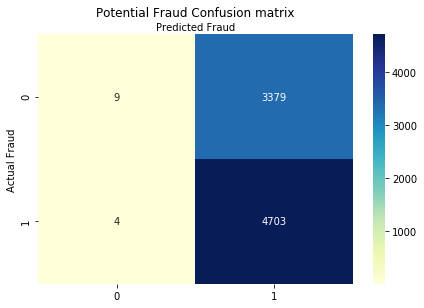

In [31]:
best_log_clf = testPerformance(log_pipe,log_param_grid)

#### **Logistic Regression Feature Importance**

We created a dataframe of features sorted by coefficient weight. It shows the top 5 negative an top 5 positive features for importance by how correlated they are with the response variable.  We calculated these weights by transposing the coefficient output from the logistic regression model, and using the Python Zip method to combine the coefficients with their corresponding feature (column) name. This gives us the feature names with their coefficient weight and preserves the index position as the label in a pandas dataframe, which we can then sort as needed.

In [32]:
display_weights(best_log_clf)    

,Feature,Weight
6092,State_36,[0.10961150924561747]
6089,State_33,[0.0823917970612495]
6136,County_160,[0.07824457599120582]
6066,State_10,[0.06418713698370881]
6063,State_7,[0.06101368747196894]
...,...,...
6067,State_11,[-0.06199798589704838]
6084,State_28,[-0.06240685328314206]
6100,State_45,[-0.06722752975646304]
6095,State_39,[-0.10039220283821143]


### **Random Forest Classifier**
A random forest classifier.
"A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree." [scikitlearn-doc]

#### Random Forest Parameters

Random forest, which is non-parametric classfier also has many parameters that can be set prior training starts.
For our data we will be using following two parameters
1. max_features
2. n_estimators

max features is number of features to consider when looking for the best split:<br>

If int, then consider max_features features at each split.<br>
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.<br>
If “auto”, then max_features=sqrt(n_features).<br>
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).<br>
If “log2”, then max_features=log2(n_features).<br>
If None, then max_features=n_features. [scikitlearn-doc]<br><br>
n_estimators is number of trees in classifier. We are going to try with 20 different size of the trees incrementaly from 10 to 200 with step size of 10.

In [33]:
rf = RandomForestClassifier(random_state=lab2_random_state)
rf_pipe = make_pipeline(rf)
rf.get_params()



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

#### Parameter Grid

In [34]:
rf_param_grid = [
      {'randomforestclassifier__max_features' :  np.arange(1,6,1),
       'randomforestclassifier__n_estimators' :  np.arange(10,210,10),
       'randomforestclassifier__random_state' :  [lab2_random_state],
       'randomforestclassifier__n_jobs'       :  [-1]
      }
  ]

#### **Random Forest GridSearch Results** 

/home/dustin/anaconda3/envs/DS7331/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



grid time:  3195.4517433720175


,params,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'randomforestclassifier__max_features': 1, 'r...",5.303545,0.526075,0.530420,0.594929,0.589504,0.592142
20,"{'randomforestclassifier__max_features': 2, 'r...",7.918934,0.529114,0.533138,0.597288,0.591787,0.594467
40,"{'randomforestclassifier__max_features': 3, 'r...",8.346876,0.534939,0.536133,0.599265,0.597477,0.598322
60,"{'randomforestclassifier__max_features': 4, 'r...",8.492380,0.542159,0.540982,0.604337,0.597631,0.600902
80,"{'randomforestclassifier__max_features': 5, 'r...",8.967054,0.543439,0.542881,0.605413,0.602550,0.603869
...,...,...,...,...,...,...,...
95,"{'randomforestclassifier__max_features': 5, 'r...",76.984839,0.621077,0.602857,0.600538,0.936112,0.731639
97,"{'randomforestclassifier__max_features': 5, 'r...",86.889605,0.623570,0.601374,0.598999,0.940421,0.731806
96,"{'randomforestclassifier__max_features': 5, 'r...",82.308565,0.622929,0.602687,0.600138,0.938282,0.732007
98,"{'randomforestclassifier__max_features': 5, 'r...",90.377248,0.624983,0.601405,0.598728,0.942715,0.732300


Best Estimator   :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                       warm_start=False)
Best Parameters  :  {'randomforestclassifier__max_features': 5, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__n_jobs': -1, 'randomforestclassifier__random_state': 100}
Best Scores      :  0.7324248050115264

10-fold Cross Validation results:
---------------------------------
F1 scores: [0.73399015 0.72321429 0.74241812 0.72443532 0.73184584 0.73384803
 0.72697503 0.7169193  0.71609996 0.71510204]

Precision scores

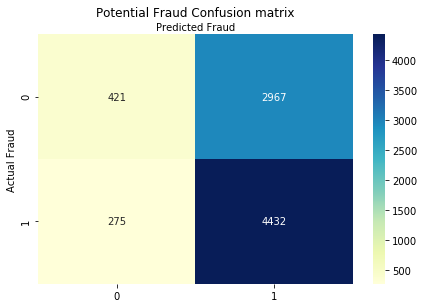

In [35]:
best_rf_clf = testPerformance(rf_pipe,rf_param_grid)

#### **Random Forest Feature Importance**

In [36]:
display_weights(best_rf_clf,"rf")

,Feature,Weight
8,ORD_AdmissionDt,0.017621
7,ORD_ClaimEndDt,0.017372
9,ORD_DischargeDt,0.017323
6,ORD_ClaimStartDt,0.017316
11,IPAnnualReimbursementAmt,0.017093
...,...,...
6981,ClmAdmitDiagnosisCode_3589,0.000000
819,ProcedureCode_7719.0,0.000000
818,ProcedureCode_7707.0,0.000000
7568,ClmAdmitDiagnosisCode_62212,0.000000


### **Naive Bayes Classifier**

Naive Bayes methods are based on Baye’s theorem with Naive assumption of conditional independence between every pair of features given the value of the class variable. As per Scikit Documenation Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

Naive Bayes is fast because all it needs are the prior probability values that do not change and can be stored ahead of time. The same probability values are reused in while calculating the posterior.

Scikit Learner provides four different types of implementations on naive Bayes algorithm:

<b>1. Gaussian Naive Bayes</b>

   GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features
   is assumed to be Gaussian and it can perform online updates to model parameters via partial_fit.But this
   implementation does not support sparse data and is not suitable for our data.
   
<b>2. Multinomial Naive Bayes</b>

   MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two
   classic naive Bayes variants typically used in text classification. The distribution is parameterized by vector ${\theta_{y}} = ({\theta_{y1}},......,{\theta_{yn}}) $  for each class y where n is number of features.
   
$ \hat{\theta}_{yi} = \frac{N_{yi}+{\alpha} }{N_{y}+{\alpha}n} $

The smoothing priors α ≥ 0 accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting α = 1 is called Laplace smoothing, while α < 1 is called Lidstone smoothing.

This alpha is hyperparameter for NB and that will be used to tune NB estimator

   <b>3. Bernoulli Naive Bayes</b>
   
BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Our dataset has all types of variables. This imeplementaiton is useful when features are binary, also this implemenation too does not support sparse data. In either case this implementation is not suitable for our dataset.

Therefore MultinomialNB is the only suiitable implementation fron Naive Bayes classfiers in our case. Grid search will be performed with different values of alpha to tune NB model to get optimized model.

In [37]:
mult_nb = MultinomialNB()
mult_pipe = make_pipeline(mult_nb)
print("Pipeline : ")
print(mult_pipe)
print("\nHyperparameters : ")
print(mult_nb.get_params())
mult_nb.get_params().keys()

Pipeline : 
Pipeline(memory=None,
         steps=[('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Hyperparameters : 
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


dict_keys(['alpha', 'class_prior', 'fit_prior'])


#### Parameter Grid

In [38]:
nb_param_grid = [
      {'multinomialnb__alpha'       :  np.logspace(-4, 4, 20),#[np.arange(1,3,10)],
       'multinomialnb__fit_prior'   :  [True]
      }
  ]

#### **Naive Bayes GridSearch Results**


grid time:  4.527057753002737


,params,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'multinomialnb__alpha': 0.0001, 'multinomialn...",0.012231,0.585309,0.585053,0.630567,0.682411,0.655419
1,{'multinomialnb__alpha': 0.0002636650898730358...,0.011672,0.585312,0.585053,0.630567,0.682411,0.655419
2,{'multinomialnb__alpha': 0.0006951927961775605...,0.011626,0.585321,0.585083,0.630585,0.682464,0.655453
3,{'multinomialnb__alpha': 0.0018329807108324356...,0.011582,0.585358,0.585161,0.630618,0.682651,0.655557
4,"{'multinomialnb__alpha': 0.004832930238571752,...",0.012034,0.585500,0.585176,0.630614,0.682731,0.655592
5,"{'multinomialnb__alpha': 0.012742749857031334,...",0.011564,0.585977,0.585222,0.630613,0.682918,0.655678
6,"{'multinomialnb__alpha': 0.03359818286283781, ...",0.012241,0.587359,0.585377,0.630608,0.683553,0.655970
7,"{'multinomialnb__alpha': 0.08858667904100823, ...",0.011775,0.590629,0.586535,0.630997,0.686785,0.657663
8,"{'multinomialnb__alpha': 0.23357214690901212, ...",0.012201,0.596518,0.588867,0.631539,0.694203,0.661348
9,"{'multinomialnb__alpha': 0.615848211066026, 'm...",0.012071,0.604550,0.595213,0.633007,0.714257,0.671141


Best Estimator   :  MultinomialNB(alpha=11.288378916846883, class_prior=None, fit_prior=True)
Best Parameters  :  {'multinomialnb__alpha': 11.288378916846883, 'multinomialnb__fit_prior': True}
Best Scores      :  0.7339238845056288

10-fold Cross Validation results:
---------------------------------
F1 scores: [0.74007782 0.73416732 0.75509419 0.7282011  0.74738878 0.7381138
 0.74007782 0.7236894  0.71762376 0.72548247]

Precision scores [0.58739963 0.57998765 0.60654725 0.57257566 0.59666461 0.58492897
 0.58739963 0.56701668 0.55960469 0.56922126]

Recall scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Average F1:  0.734991646448452
Min F1:  0.7176237623762376
Max F1:  0.7550941945405613

Average Precision:  0.5811346029191362
Min Precision:  0.5596046942557134
Max Precision:  0.6065472513897467

Average Recall:  1.0
Min Recall:  1.0
Max Recall:  1.0

Single Run results:
---------------------------------
Accuracy: 0.591846819024089
Precision: 0.5909032007256706
Recall: 0.9687699171446782
F1: 

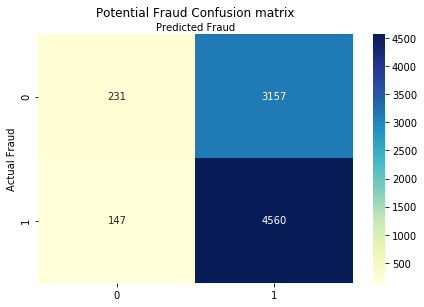

In [39]:
best_nb_clf = testPerformance(mult_pipe,nb_param_grid,n1_jobs=None)

#### **Naive Bayes Feature Importance**

In [40]:
display_weights(best_nb_clf)


,Feature,Weight
9093,AttendingPhysicianPresent_1,[-3.5823621148168243]
6403,NoOfMonths_PartACov_12,[-3.587036077828108]
4,ORD_DOD,[-3.5876059096564443]
6427,Alive_N,[-3.5876285973924205]
6415,NoOfMonths_PartBCov_12,[-3.5886528679271024]
...,...,...
5689,DiagnosisCode_V1012,[-10.99258047924537]
7526,ClmAdmitDiagnosisCode_6073,[-10.99258047924537]
7525,ClmAdmitDiagnosisCode_605,[-10.99258047924537]
5693,DiagnosisCode_V1040,[-10.99258047924537]


## **Task 2: Regression Models**
In this section we will first print out the available parameters we can utilize for hypertuning, this will aid us in creating the hypertuning parameters in the grid search.

For the regression models, we wrote a simple helper function that prints out the best model, with params and best scores for a given grid object. This is helpful if we need to work with these models later, we don't have to re-run the whole grid search, which depending on the model, can take upwards of an hour to run.

In [83]:
def RegResults(grid):
    print('Best Estimator   : ',grid.best_estimator_[0])
    print('Best Parameters  : ',grid.best_params_)
    print('Best Scores      : ',grid.best_score_)    

### **Split Train/Test**

The test/train splits we use mimic the splits we used for classification, we will follow the exact same steps, just on a re-arranged dataset to predict Claim Amount Reimbursed instead of Potential Fraud.

In [41]:
reg_X = csc_matrix(reg_X1)
reg_X_train,reg_X_test,reg_y_train,reg_y_test = train_test_split(reg_X,reg_target,test_size=0.2,random_state=86)

### **Linear Regression Assumption Checking**

Multiple Linear Regression has a few assumptions that must be met in order to accurately make predictions:
1. Normality – Residuals of the linear model is assumed to be normally distributed
2. Equal Variance – The variance of the residuals is constant for every combination of independent variables and thus constant across all of the predicted values (we can validate this with residual plots)
3. Independence – Observations are identically and independently distributed.

Below we will display a residual plot and the Cook's D plot.  The Residual plot will show us normality and equal variance, and Cook's D will show if there are a large number of high levera outliers.  Ideally, we want to see a random cloud of residuals, with no identifiable pattern, as well as a normal distribution.  We will assume the observations to be independent, we have removed all known correlated features in our pre-processing section.


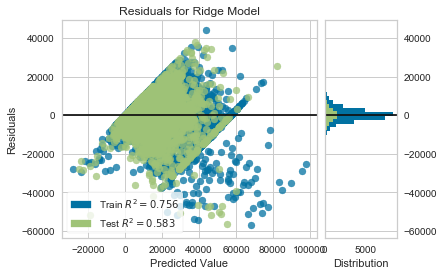

In [96]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(reg_X_train, reg_y_train)  # Fit the training data to the visualizer
visualizer.score(reg_X_test, reg_y_test)  # Evaluate the model on the test data
visualizer.show()

/home/dustin/anaconda3/envs/DS7331/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/dustin/anaconda3/envs/DS7331/lib/python3.7/site-packages/yellowbrick/regressor/influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


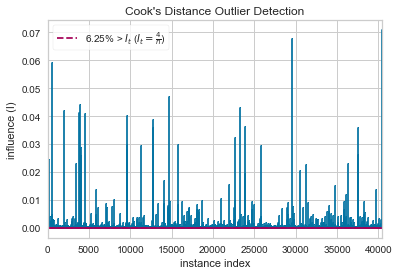

6.25339724267431

In [102]:
# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(Xlab2_df.iloc[:,0:13], Xlab2_df.loc[:,'InscClaimAmtReimbursed'])
visualizer.show()
visualizer.outlier_percentage_

In [51]:
list(Lasso().get_params())

['alpha',
 'copy_X',
 'fit_intercept',
 'max_iter',
 'normalize',
 'positive',
 'precompute',
 'random_state',
 'selection',
 'tol',
 'warm_start']

### **Multiple Linear Regression (Lasso)**

In [85]:
"""Lasso Regression code"""
LassoPipe= make_pipeline(Lasso())
LassoParams = [
    {
         'lasso__alpha':[1,3,5,10],
         'lasso__selection':['cyclic','random'],
         'lasso__max_iter':[100,250]
    }
]
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=86)
#Perform the grid search using accuracy as a metric during cross validation.
LassoGrid = GridSearchCV(LassoPipe, LassoParams, cv=cv, scoring=['neg_mean_squared_error','r2'], n_jobs=-1, refit='neg_mean_squared_error')
#Use the best features from recursive feature elimination during the grid search
start_time = timeit.default_timer()
LassoGrid.fit(reg_X_train, reg_y_train)
grid_time = timeit.default_timer() - start_time
#display the best pipeline model identified during the grid search
print("\ngrid time: ", grid_time)
LassoGridResults = pd.DataFrame.from_dict(LassoGrid.cv_results_)
LassoGridResults


grid time:  242.50591220299248


/home/dustin/anaconda3/envs/DS7331/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224141735173.9709, tolerance: 348487657.98130476
  max_iter, tol, rng, random, positive)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,param_lasso__max_iter,param_lasso__selection,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,23.758848,0.230649,0.001514,0.000193,1,100,cyclic,"{'lasso__alpha': 1, 'lasso__max_iter': 100, 'l...",-4.239498e+07,-3.849005e+07,...,0.614846,0.624079,0.624343,0.629439,0.632260,0.609078,0.616680,0.619115,0.008261,2
1,24.001731,0.256023,0.001350,0.000133,1,100,random,"{'lasso__alpha': 1, 'lasso__max_iter': 100, 'l...",-4.239259e+07,-3.848775e+07,...,0.614911,0.624092,0.624260,0.629385,0.632265,0.610924,0.616747,0.619307,0.008034,1
2,60.455637,0.449316,0.001199,0.000029,1,250,cyclic,"{'lasso__alpha': 1, 'lasso__max_iter': 250, 'l...",-4.239682e+07,-3.849040e+07,...,0.614837,0.624079,0.624330,0.629451,0.632251,0.609071,0.616677,0.619110,0.008262,3
3,47.859698,11.396224,0.001223,0.000063,1,250,random,"{'lasso__alpha': 1, 'lasso__max_iter': 250, 'l...",-4.254986e+07,-3.848988e+07,...,0.614871,0.624083,0.624552,0.629405,0.632283,0.609779,0.616740,0.619077,0.008149,4
4,19.620330,0.186284,0.001189,0.000039,3,100,cyclic,"{'lasso__alpha': 3, 'lasso__max_iter': 100, 'l...",-4.282724e+07,-3.850482e+07,...,0.604664,0.613499,0.618395,0.622126,0.621213,0.595883,0.616777,0.611895,0.009278,8
5,17.902373,3.708311,0.001206,0.000043,3,100,random,"{'lasso__alpha': 3, 'lasso__max_iter': 100, 'l...",-4.283158e+07,-3.850080e+07,...,0.604753,0.613521,0.618420,0.622111,0.621190,0.595905,0.616745,0.611901,0.009268,5
6,24.535237,0.576547,0.001209,0.000065,3,250,cyclic,"{'lasso__alpha': 3, 'lasso__max_iter': 250, 'l...",-4.283173e+07,-3.849974e+07,...,0.604754,0.613521,0.618419,0.622053,0.621192,0.595904,0.616747,0.611896,0.009262,7
7,19.444625,4.401521,0.001190,0.000028,3,250,random,"{'lasso__alpha': 3, 'lasso__max_iter': 250, 'l...",-4.283107e+07,-3.849962e+07,...,0.604758,0.613521,0.618420,0.622047,0.621193,0.595904,0.616747,0.611897,0.009262,6
8,15.191688,0.322128,0.001202,0.000030,5,100,cyclic,"{'lasso__alpha': 5, 'lasso__max_iter': 100, 'l...",-4.421125e+07,-3.982569e+07,...,0.590724,0.596825,0.603576,0.610614,0.604539,0.582268,0.606639,0.598472,0.009188,10
9,13.121018,2.209811,0.001186,0.000020,5,100,random,"{'lasso__alpha': 5, 'lasso__max_iter': 100, 'l...",-4.421142e+07,-3.982544e+07,...,0.590725,0.596825,0.603575,0.610618,0.604538,0.582223,0.606643,0.598469,0.009196,12


In [87]:
#Print out the best model, so if we need to reference it, we don't have to re-run the whole grid search:
RegResults(LassoGrid)

Best Estimator   :  Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='random',
      tol=0.0001, warm_start=False)
Best Parameters  :  {'lasso__alpha': 1, 'lasso__max_iter': 100, 'lasso__selection': 'random'}
Best Scores      :  -40885999.70215637


### **Random Forest Regressor**

The random forest regressor uses bootstrapping to randomly sample with replacement from the dataset to approximate a normal distribution.

In [90]:
list(RandomForestRegressor().get_params())

['bootstrap',
 'ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [88]:
"""Random Forest Regression code"""

rfrPipe = make_pipeline(RandomForestRegressor())
rfrParams = [
    {
         'randomforestregressor__n_jobs':[-1],
         'randomforestregressor__max_features':['auto','sqrt','log2'],
         'randomforestregressor__min_samples_leaf':[1,3,5,10]


    }
]
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=86)
#Perform the grid search using accuracy as a metric during cross validation.
RFgrid = GridSearchCV(rfrPipe, rfrParams, cv=cv, scoring=['neg_mean_squared_error','r2'], n_jobs=-1, refit='neg_mean_squared_error')
#Use the best features from recursive feature elimination during the grid search
start_time = timeit.default_timer()
RFgrid.fit(reg_X_train, reg_y_train)
grid_time = timeit.default_timer() - start_time
#display the best pipeline model identified during the grid search
print("\ngrid time: ", grid_time)
RFgridResults = pd.DataFrame.from_dict(RFgrid.cv_results_)
RFgridResults

/home/dustin/anaconda3/envs/DS7331/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



grid time:  1442.529493258975


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_features,param_randomforestregressor__min_samples_leaf,param_randomforestregressor__n_jobs,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,866.855449,3.728433,0.584259,0.078922,auto,1,-1,{'randomforestregressor__max_features': 'auto'...,-3.191933e+07,-2.527241e+07,...,0.721703,0.754945,0.746792,0.745342,0.754410,0.730014,0.744965,0.740218,0.012667,1
1,501.857162,33.395682,0.766935,0.247536,auto,3,-1,{'randomforestregressor__max_features': 'auto'...,-3.198165e+07,-2.518940e+07,...,0.714116,0.749221,0.746712,0.750169,0.760319,0.731132,0.749539,0.740132,0.014679,2
2,359.975192,9.648553,0.566355,0.144581,auto,5,-1,{'randomforestregressor__max_features': 'auto'...,-3.159672e+07,-2.626285e+07,...,0.713830,0.747755,0.747346,0.749312,0.755121,0.724267,0.747623,0.738237,0.013745,3
3,259.614918,24.728163,0.642905,0.251085,auto,10,-1,{'randomforestregressor__max_features': 'auto'...,-3.222171e+07,-2.621020e+07,...,0.710747,0.740856,0.744047,0.745943,0.751192,0.722405,0.745737,0.734847,0.013671,4
4,67.557383,4.427440,0.808688,0.083334,sqrt,1,-1,{'randomforestregressor__max_features': 'sqrt'...,-5.521786e+07,-4.484246e+07,...,0.534250,0.523818,0.511552,0.505937,0.531380,0.498846,0.531629,0.519921,0.015331,5
5,21.768990,2.863726,1.070575,0.122251,sqrt,3,-1,{'randomforestregressor__max_features': 'sqrt'...,-6.348398e+07,-5.261470e+07,...,0.454599,0.449839,0.463796,0.460231,0.467757,0.454363,0.463392,0.456075,0.010796,6
6,14.058832,3.184964,0.786595,0.207939,sqrt,5,-1,{'randomforestregressor__max_features': 'sqrt'...,-6.665132e+07,-5.711552e+07,...,0.430063,0.427941,0.423420,0.409796,0.422622,0.400433,0.425591,0.418664,0.009581,7
7,7.279075,0.953118,0.633086,0.117521,sqrt,10,-1,{'randomforestregressor__max_features': 'sqrt'...,-7.077757e+07,-6.123971e+07,...,0.356537,0.350588,0.367441,0.359788,0.379854,0.358473,0.383810,0.366715,0.011343,9
8,56.417087,2.611141,0.703325,0.232717,log2,1,-1,{'randomforestregressor__max_features': 'log2'...,-6.853213e+07,-6.042591e+07,...,0.392073,0.372934,0.388330,0.378730,0.378901,0.374808,0.391926,0.382348,0.008980,8
9,10.048386,1.349505,0.864136,0.151285,log2,3,-1,{'randomforestregressor__max_features': 'log2'...,-8.705362e+07,-7.726451e+07,...,0.239734,0.235550,0.214459,0.214469,0.238944,0.227935,0.223921,0.225337,0.009580,10


In [89]:
#Print out the best model, so if we need to reference it, we don't have to re-run the whole grid search:
RegResults(RFgrid)

Best Estimator   :  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best Parameters  :  {'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__n_jobs': -1}
Best Scores      :  -27915890.15361797


### **KNN Regressor**

In [91]:
list(KNeighborsRegressor().get_params())

['algorithm',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'weights']

In [55]:

RegKnnPipe = make_pipeline(KNeighborsRegressor())
RegKnnParams = [
    {
         'kneighborsregressor__weights': ['uniform','distance'],
         'kneighborsregressor__leaf_size': [30,50,100],
         'kneighborsregressor__p': [1,2],
         'kneighborsregressor__algorithm':['atuo','ball_tre','kd_tree','brute'],
         'kneighborsregressor__n_neighbors':[3,5,7,9,11,13,15],
         'kneighborsregressor__n_jobs':[-1]
    }
]
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=86)
#Perform the grid search using accuracy as a metric during cross validation.
KNNgrid = GridSearchCV(RegKnnPipe, RegKnnParams, cv=cv, scoring=['neg_mean_squared_error','r2'], n_jobs=-1, refit='neg_mean_squared_error')
#Use the best features from recursive feature elimination during the grid search
start_time = timeit.default_timer()
KNNgrid.fit(reg_X_train, reg_y_train)
grid_time = timeit.default_timer() - start_time
#display the best pipeline model identified during the grid search
print("\ngrid time: ", grid_time)
KNNgridResults = pd.DataFrame.from_dict(KNNgrid.cv_results_)
KNNgridResults
#grid.best_estimator_

/home/dustin/anaconda3/envs/DS7331/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



grid time:  3929.7580388349597


/home/dustin/anaconda3/envs/DS7331/lib/python3.7/site-packages/sklearn/neighbors/_base.py:413: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__algorithm,param_kneighborsregressor__leaf_size,param_kneighborsregressor__n_jobs,param_kneighborsregressor__n_neighbors,param_kneighborsregressor__p,param_kneighborsregressor__weights,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.025432,0.003887,0.000000,0.000000,atuo,30,-1,3,1,uniform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169
1,0.019551,0.004040,0.000000,0.000000,atuo,30,-1,3,1,distance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229
2,0.017745,0.000825,0.000000,0.000000,atuo,30,-1,3,2,uniform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228
3,0.021972,0.003555,0.000000,0.000000,atuo,30,-1,3,2,distance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227
4,0.026195,0.003746,0.000000,0.000000,atuo,30,-1,5,1,uniform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.135098,0.094558,29.819597,2.918157,brute,100,-1,13,2,distance,...,0.015259,0.022317,0.019598,0.011585,0.008191,-0.000454,0.024392,0.011812,0.008840,79
332,0.126344,0.074117,44.688378,2.251304,brute,100,-1,15,1,uniform,...,0.046885,0.056157,0.052098,0.041020,0.040550,0.036488,0.057855,0.045925,0.007903,19
333,0.109485,0.040684,42.365395,3.416318,brute,100,-1,15,1,distance,...,0.049879,0.059049,0.055499,0.044650,0.043247,0.038419,0.062437,0.048937,0.008322,1
334,0.115591,0.043879,28.195452,1.954103,brute,100,-1,15,2,uniform,...,0.017380,0.019991,0.018611,0.009157,0.005490,-0.001886,0.024453,0.011016,0.008668,91


In [84]:
#Print out the best model, so if we need to reference it, we don't have to re-run the whole grid search:
RegResults(KNNgrid)

Best Estimator   :  KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                    weights='distance')
Best Parameters  :  {'kneighborsregressor__algorithm': 'kd_tree', 'kneighborsregressor__leaf_size': 30, 'kneighborsregressor__n_jobs': -1, 'kneighborsregressor__n_neighbors': 15, 'kneighborsregressor__p': 1, 'kneighborsregressor__weights': 'distance'}
Best Scores      :  -102172020.80649403


# **Modeling and Evaluations 4**

__TODO:__ Visualize results 

People don't explain 'why' which will deduct points 

Analyze how the model is performing 

Explaination is bolstered by analysis 

TIP: YellowBrick (it's a pkg) for visualizing estimators 

### Function Definitions:

In [167]:
def LCplot(model):
    # Create the learning curve visualizer
    sizes = np.linspace(0.3, 1.0, 10)

    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(
        model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=-1
    )

    visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
    visualizer.show()           # Finalize and render the figure

In [223]:
def cvTest(model, n1_jobs=-1): # Test only, no Grid:
    print('---------------------------------')
    modelName = str(model).split('(')[0]
    print('\n'+ modelName +' Results:')

    model.fit(X_train,y_train)

    fit_time = timeit.default_timer() - start_time

    # do 10-fold cross validation:
    AUCscores  = cross_val_score(model, X_test, y_test, cv=cv, scoring='roc_auc' , n_jobs=n1_jobs)
    f1scores  = cross_val_score(model, X_test, y_test, cv=cv, scoring='f1'       , n_jobs=n1_jobs)
    PreScores = cross_val_score(model, X_test, y_test, cv=cv, scoring='precision', n_jobs=n1_jobs)
    RecScores = cross_val_score(model, X_test, y_test, cv=cv, scoring='recall'   , n_jobs=n1_jobs)
    
    print('\n10-fold Cross Validation results:')
    print('---------------------------------')
    print('F1 scores:', f1scores)
    print('\nPrecision scores', PreScores)
    print('\nRecall scores', RecScores)

    print('\nAverage F1: ',np.average(f1scores))
    print('Min F1: ',np.min(f1scores))
    print('Max F1: ',np.max(f1scores))
    
    print('\nAverage Precision: ',np.average(PreScores))
    print('Min Precision: ',np.min(PreScores))
    print('Max Precision: ',np.max(PreScores))
    
    print('\nAverage Recall: ',np.average(RecScores))
    print('Min Recall: ',np.min(RecScores))
    print('Max Recall: ',np.max(RecScores))
    
    print('\nAverage AUC: ',np.average(AUCscores))
    print('Min AUC: ',np.min(AUCscores))
    print('Max AUC: ',np.max(AUCscores))

    cv_time = timeit.default_timer() - start_time - fit_time

    # Build Confusion Matrix to test generality:
    y_pred=model.predict(X_test)
    #y_pred=model.predict_proba(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(modelName+' Confusion matrix', y=1.1)
    plt.ylabel('Actual Fraud')
    plt.xlabel('Predicted Fraud')
    plt.show
    print('\nSingle Run results:')
    print('---------------------------------')
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("F1:",metrics.f1_score(y_test, y_pred))
    
    print("\nFit time: ", fit_time)
    print("CV time: ", cv_time)
    print("Total time: ", timeit.default_timer() - start_time)

In [224]:
#define 3 functions to plot the ROC curve
def calculate_probability(classifier, A, B, D):
    probas_ = classifier.fit(A, B).predict_proba(D)
    return probas_

#def calculate_probability_based_on_confidence(classifier, A, B, D):
#    probas_ = classifier.fit(A, B).decision_function(D)
#    return probas_
    
def plotROCcurve(classifier, X, y, cv, calculate_probability, model):
    # Run classifier with cross-validation and plot ROC curves
    tprs = []
    aucs = []

    mean_fpr = np.linspace(0, 1, 100)
    
    i = 0
    for train, test in cv.split(X, y):
        probas_ = calculate_probability(classifier, X[train], y[train], X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
        
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
        
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic--{model}')
    plt.legend(loc="lower right")
    plt.show()
    return mean_fpr, mean_tpr, mean_auc, std_auc





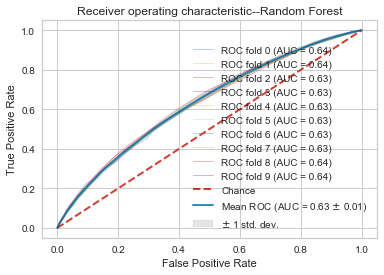

In [80]:
warnings.simplefilter(action='ignore', category=Warning)

%matplotlib inline

#plot random forest ROC curves and AUC
classifier = best_rf_clf.best_estimator_

mean_fpr_rf, mean_tpr_rf, mean_auc_rf, std_auc_rf = plotROCcurve(classifier, X,target_df, cv, calculate_probability, model='Random Forest')


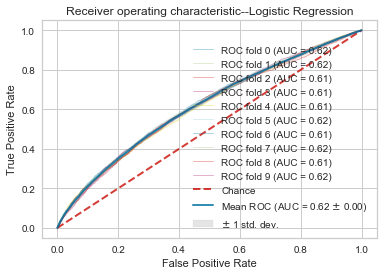

In [81]:
%matplotlib inline
#plot Logicstic Regression ROC curves and AUC
classifier = best_log_clf.best_estimator_

mean_fpr_lg, mean_tpr_lg, mean_auc_lg, std_auc_lg = plotROCcurve(classifier, X,target_df, cv, calculate_probability, model='Logistic Regression')


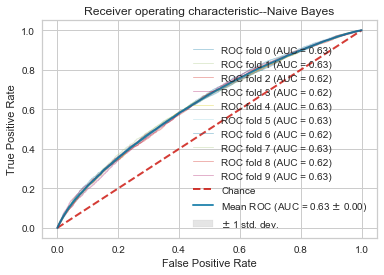

In [82]:
%matplotlib inline
#plot Naive Bayes ROC curves and AUC
classifier = best_nb_clf.best_estimator_

mean_fpr_nb, mean_tpr_nb, mean_auc_nb, std_auc_nb = plotROCcurve(classifier, X,target_df, cv, calculate_probability, model='Naive Bayes')

warnings.simplefilter(action='default', category=Warning)

In [ ]:
#plot all average ROC curves in one graph
%matplotlib inline

plt.figure(figsize=(16,9))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

plt.plot(mean_fpr_rf, mean_tpr_rf, color='tab:blue',
         label=r'Mean Random Forest ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_rf, std_auc_rf),
         lw=2, alpha=.8)

plt.plot(mean_fpr_nb, mean_tpr_rf, color='tab:green',
         label=r'Mean Naive Bayes ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_nb, std_auc_nb),
         lw=2, alpha=.8)

plt.plot(mean_fpr_lg, mean_tpr_lg, color='tab:olive',
         label=r'Mean Logistic Regression ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_lg, std_auc_lg),
         lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#reg_y_pred = grid.predict(reg_X_test)
warnings.simplefilter(action='ignore', category=Warning)

model = KNNgrid.best_estimator_[0]
visualizer = PredictionError(model)

visualizer.fit(reg_X_train, reg_y_train)  # Fit the training data to the visualizer
visualizer.score(reg_X_test, reg_y_test)  # Evaluate the model on the test data
visualizer.show() 

warnings.simplefilter(action='default', category=Warning)



### Classifier Learning Curves

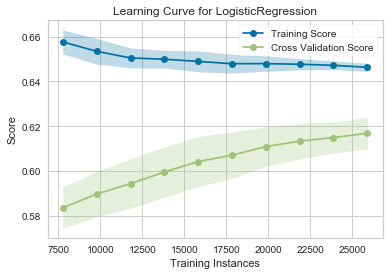

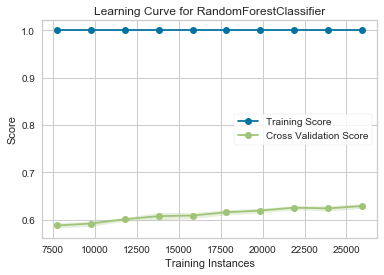

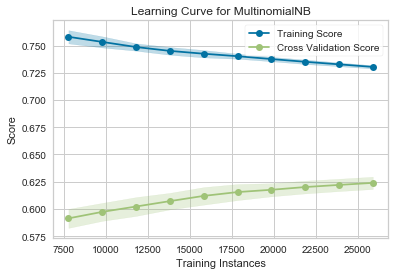

In [173]:
warnings.simplefilter(action='ignore', category=Warning)
LCplot(best_log_clf.best_estimator_)
LCplot(best_rf_clf.best_estimator_)
LCplot(best_nb_clf.best_estimator_)
warnings.simplefilter(action='default', category=Warning)


### Classifier Generalization Performance

In [225]:
cvTest(best_log_clf.best_estimator_[0])
cvTest(best_rf_clf.best_estimator_[0])
cvTest(best_nb_clf.best_estimator_[0], None)

---------------------------------

LogisticRegression Results:

10-fold Cross Validation results:
---------------------------------
F1 scores: [0.72870043 0.74056787 0.71711569 0.71711569 0.74641889 0.71303657
 0.73367227 0.7282011  0.73317684 0.71354787]

Precision scores [0.57319333 0.58801729 0.55898703 0.55898703 0.59542928 0.55404571
 0.57936998 0.57257566 0.57875232 0.55466337]

Recall scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Average F1:  0.7271553227028462
Min F1:  0.7130365659777425
Max F1:  0.7464188927603562

Average Precision:  0.5714021000617666
Min Precision:  0.5540457072266831
Max Precision:  0.5954292773316863

Average Recall:  1.0
Min Recall:  1.0
Max Recall:  1.0

Average AUC:  0.5680828335061181
Min AUC:  0.5472843580018962
Max AUC:  0.5980670721327206


<IPython.core.display.Javascript object>


Single Run results:
---------------------------------
Accuracy: 0.5820877084620136
Precision: 0.5819104182133136
Recall: 0.999150201827066
F1: 0.7354757995152085

Fit time:  26191.657930755
CV time:  1.6230682050227188
Total time:  26193.37892396102
---------------------------------

RandomForestClassifier Results:

10-fold Cross Validation results:
---------------------------------
F1 scores: [0.72077922 0.73249696 0.71644227 0.71410942 0.73276214 0.7010395
 0.72374798 0.71796971 0.72363042 0.70496512]

Precision scores [0.578125   0.5957867  0.56791721 0.56880734 0.60390047 0.55901857
 0.58257477 0.57849604 0.58648111 0.55815465]

Recall scores [0.95689655 0.95063025 0.97016575 0.95911602 0.93153527 0.93979933
 0.95522388 0.94606257 0.94450374 0.95657016]

Average F1:  0.7187942741012272
Min F1:  0.701039501039501
Max F1:  0.7327621379028968

Average Precision:  0.5779261859146974
Min Precision:  0.5581546458739441
Max Precision:  0.6039004707464694

Average Recall:  0.9510503511840

<IPython.core.display.Javascript object>


Single Run results:
---------------------------------
Accuracy: 0.5995058678196418
Precision: 0.5989998648466008
Recall: 0.9415763756107924
F1: 0.7321989096315876

Fit time:  26201.00311292702
CV time:  45.337251016986556
Total time:  26246.726180494996
---------------------------------

MultinomialNB Results:

10-fold Cross Validation results:
---------------------------------
F1 scores: [0.72870043 0.74056787 0.71711569 0.71711569 0.74641889 0.71303657
 0.73367227 0.7282011  0.73317684 0.71354787]

Precision scores [0.57319333 0.58801729 0.55898703 0.55898703 0.59542928 0.55404571
 0.57936998 0.57257566 0.57875232 0.55466337]

Recall scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Average F1:  0.7271553227028462
Min F1:  0.7130365659777425
Max F1:  0.7464188927603562

Average Precision:  0.5714021000617666
Min Precision:  0.5540457072266831
Max Precision:  0.5954292773316863

Average Recall:  1.0
Min Recall:  1.0
Max Recall:  1.0

Average AUC:  0.574286569424454
Min AUC:  0.5536693043006529

<IPython.core.display.Javascript object>


Single Run results:
---------------------------------
Accuracy: 0.591846819024089
Precision: 0.5909032007256706
Recall: 0.9687699171446782
F1: 0.7340631036703156

Fit time:  26246.735563847004
CV time:  0.23782242799643427
Total time:  26247.06759300601


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [233]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
logistic_grid_results = pd.read_excel("LogisticRegression_CV_Results.xlsx",index_col=0)
log_liblinear_df = logistic_grid_results[logistic_grid_results['param_logisticregression__solver']=='liblinear']
log_liblinear = {}
for column in log_liblinear_df.columns:
    log_liblinear[column] = log_liblinear_df[column].to_numpy()
log_sag_df = logistic_grid_results[logistic_grid_results['param_logisticregression__solver']=='sag']
log_sag = {}
for column in log_sag_df.columns:
    log_sag[column] = log_sag_df[column].to_numpy()
scoring = {'accuracy': make_scorer(metrics.accuracy_score),'recall': make_scorer(metrics.recall_score),
           'precision': make_scorer(metrics.precision_score),'f1': make_scorer(metrics.f1_score),           
           'roc_auc' : 'roc_auc'
          }
X_liblinear = np.array(log_liblinear['param_logisticregression__C'], dtype=float)
X_sag = np.array(log_sag['param_logisticregression__C'], dtype=float)

In [234]:
#liblinear
viz_hyperparameter(log_liblinear,X_liblinear,xlabel="Parameter C",scoring=scoring,
                   xlim=[-10,100],ylim=[0.55,.75],plot_title=" : Logistic liblinear solver")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [236]:
scoring = {'accuracy': make_scorer(metrics.accuracy_score),'recall': make_scorer(metrics.recall_score),
           'precision': make_scorer(metrics.precision_score),'f1': make_scorer(metrics.f1_score)
          }

viz_hyperparameter(log_sag,X_sag,xlabel="Parameter C",scoring=scoring,
                   xlim=[-10,100],ylim=[0.55,.75],plot_title=" : Logistic sag solver")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [218]:
rf_grid_results = pd.read_excel("RandomForestClassifier_CV_Results.xlsx",index_col=0)
rf_grid_results = rf_grid_results.rename(columns={'param_randomforestclassifier__max_features': 'max_features', 
                                                  'param_randomforestclassifier__n_estimators': 'n_estimators'})
grid_results = rf_grid_results.loc[:,['max_features','n_estimators','mean_test_f1']]
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'mean_test_f1']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

In [219]:
import plotly.graph_objects as go
# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )
fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )
fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [213]:
import plotly.graph_objects as go
fig = go.Figure(data= go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='mean_test_f1'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [211]:
warnings.simplefilter(action='default', category=Warning)


# Modeling and Evaluations 5**

__TODO:__
Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

Give table, how many models you built 

CV results object from grid search will give all of that information 

TIP Put in a dataframe in ME5 and then talk about 

Here's all the models we did, here is the best one (or top 3) 

Is there one that runs 10x as long and a slightly inferior runs fast 

Is the difference between models significant? 

Long method 1: Notebook #6 and use student's paired t test (at bottom), correct t value and folds 

Long method 2: generate ROC curves for each model 

If you use ROC as your eval metric, it is statistically sound measure, so if one has a larger area under curve, it is a better model statistically speaking. 

Can use micro average ROC curve with multiclass problem 

If you already did both, ask for exceptional points 

TIP: mlxtend has an 'evaluate' library for significant test 

Can get comprehensive with paired_ttest5x2cv 

Calling library and function will spit out exactly what you need 

# **Modeling and Evaluations 6**

__TODO:__ Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

    Two options: 
Both tasks are on same dataset.  do two feature importance and opine difference between two 

Make sure you do feature importance on scaled data if you're using coefficients 

Use some other type of feature eval technique (mlextend library has multiple options) 

# **Deployment**

### Practicality / Usefulness
__TODO:__ How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? 

### Delivering Value
__TODO:__ How would you measure the model's value if it was used by these parties? 

### Implementing in Production
__TODO:__ How would your deploy your model for interested parties? 

### Additional or 'nice to have' Data
__TODO:__ What other data should be collected? 

### Expected Update Cycle
__TODO:__ How often would the model need to be updated, etc.? 


    Address each question (in a subsection) 

2 ways to go about it 

Just because you can't predict something in the real world, doesn't necessarily mean you aren't interested in model's ability to predict 

Predict graduation rate for public schools (schools know their rates.. But they would be interested in what is correlated with grad rates) 

Maybe it's not useful for prediction, but could be used for EDA 

# **Exceptional Work**
### **Preprocessing**:
We would like credit for the large amount of preprocessing that went into our data.  We have a large variety of features in the dataset, many of which required clever feature engineering tricks to improve performance.  
* Conversion to sparse matrix took a good bit of research, and continues to be an effort for implementation, since not every model or library will accept a sparse matrix.  This also complicated our pipeline/gridsearch, as we were unable to find an out of the box solution for scaling our data, and then converting to sparse matrix before test/train splits.  We could have incorporated this into a custom transformer feature for use in the pipeline if we had more time.  We ultimately decided against it, since the scaling and transformation to sparse are fairly computationally expensive, we thought it would be more efficient to keep this out of the pipeline (process once globally, instead of once per model). 

* Conversion of procedure codes and diagnosis codes from multiple columns into a one hot encoded dataframe took a significant amount of time/effort, most of the out of the box libraries we tried would not parse a list object and it took a lot of experimentation and research.  Capturing several columns into a list wasn't complicated, and we contemplated using the Binarizer for all one-hot encoding, but settled on using it first, and then passing to Pandas, since the get_dummies function killed two birds with one stone (one-hot encoding and conversion to sparse). 

These transformations were necessary to allow modeling on a consumer grade PC, as the dense dataset consumes over 60gb of RAM and takes several hours per training evolution.  Our preprocessing also improved prediction performance and improved manageability, reducing our total featureset footprint from > 40,000 to around 9,000.   

### **Pipelines and Grid Search**:
We decided to implement Pipelines and Grid Search in order to reduce the copy/paste and number of variables we need to work with.  This is a new concept barely touched on in class, and it required significant amounts of research time to implement before we could move on to model evaluation, visualization and discussion. 
* We didn't fully utilize the pipeline approach, since we scaled and split our data prior to the pipelines (to save time).  We also didn't try vectorization or any other transformers on the data.  The pipeline did enable us to use the gridsearch function which was extremely useful in hypertuning our parameters.  Passing in several parameters and letting the PC do all of the work testing each parameter variation was incredibly useful, especially being able to output the returned object from the search.
* We created several helper functions that incorporated the gridsearch and the output of the gridsearch to help speed up our analysis.  The grid search runs quite long, depending on how much hypertuning we are trying to squeeze in.  Storing the output of the gridsearch as an object, exporting the CV results to .xlsx files and printing the models allowed teammates to pick up a notebook and use the best model parameters without re-running the grid search.

# References

1. <a href="https://machinelearningmastery.com/k-fold-cross-validation/"> https://machinelearningmastery.com/k-fold-cross-validation/ </a> K-Fold Cross Validation
2. An Introduction to Statistical Learning with Applications in R. Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. Springer Seventh Printing. p29
